#**Naïf**

In [ ]:
def naif(needle, haystack,firstOccurence=False):
    # comparison counter
    C=0
    n=len(haystack) # length of Text
    m=len(needle) # length of pattern
    i=0 # index initialization
    output=[]
    # from 0 to the latest window in Text
    while(i<(n-m+1)):
        j=0
        # while there's a match and we're not out of bounds
        while((j<m) and (haystack[i+j]==needle[j])):
            # we increment the counter
            C=C+1
            # we compare the next character
            j=j+1
        # if we reached the end of the pattern, we have a full match
        if(j==m):
          if (firstOccurence):
            return {'index':i, 'comparaisons':C}
          else:
            output.append(i)
        # otherwise there has been a mismatch that needs to be counted
        else:
          C+=1
        # we shift the window
        i=i+1
    if (firstOccurence):
      return {'index':-1, 'comparaisons':C}
    else:
      return {'indecies':output, 'comparaisons':C}


In [ ]:
# Test du cours avec un résultat attendu de 53 comparaisons
naif("aaaaataaaaa", "taaaaataaaataaaaataaaaaa", True)

{'comparaisons': 53, 'index': 12}

# Moris Pratt Algorithm

## Defined functions and uses

*   borderLength (recursive calculus of the length of the largest border of a given string)
*   preMP (generates a border table of a given string)
*   recursivePreMp(generates a border table of a given string using borderLength)
*   Mp (full implementation of the Moris Pratt algorithm using recursivePreMp and borderLength)

In [ ]:

def preMp(pattern:str):
  """
  Function for generating borders table for moris pratt Algorithm
  """
  # initialization
  m = len(pattern)
  border = [None for i in range(m+1)]
  # looping throught the pattern
  for x in range(m+1):
    # for each x from 0 to m+1 we compute
    # a prefix from 0 to x, and initialize its length
    prefix = pattern[:x]
    n = len(prefix)
    # if the length is less than one, there's no border
    # and the default border value is -1
    if len(prefix) < 1:
      border[n] = -1
    # if the length is greater than one, we compute
    # the length of the largest border of the prefix
    else:
      # for each J from 0 to half the length of the prefix
      for j in range(int(n/2)):
        # we check if the strings of length j+1 from either sides
        # of the prefix match
        if prefix[:j+1] == prefix[n-j-1:]:
          # if they do we store it's length
          border[n] = len(prefix[:j+1])
        # since the prefix border is sequentially growing,
        # we now that a larger border found overwrites a previous border length
      # if no borders were found we replace the None by 0 indicating so
      if border[n] == None:
        border[n] = 0
  return border

In [ ]:
# border generation function for Moris Pratt
# Documented


def borderLength(pattern:str,n= None):
  """
  Recursive function that computes the length of the largest border
  of a given pattern
  """
  # initializer, if n isn't specified (so None) we set it as pattern length-1
  if n is None:
    n = len(pattern) -1
  # if n is 0 ie the sought length of the border is 0
  # we return 0 as in "No border"
  if n == 0:
    return 0
  # we check if there's a border of length n
  if pattern[:n] == pattern[len(pattern)-n:]:
    return n
  # if there's no border of length n we look for a border of length n-1
  else:
    return borderLength(pattern,n-1)


def recursivePreMp(pattern:str):
  """
  Function using recursive borderLength for generating borders table for moris pratt Algorithm
  """
  m = len(pattern)
  # initialize the border list
  border = [None for i in range(m+1)]
  # for each prefix of the pattern
  for x in range(m+1):
    prefix = pattern[:x]
    n = len(prefix)
    # we assign the largest border of the prefix to the list
    border[n] = borderLength(prefix)
  return border

def Mp(needle:str, haystack:str, time=False, firstOccurence=False):
  # Initialisations
  output = [] # initializing the output list
  borders = recursivePreMp(needle) # compute the borders List
  startTime= 0 # initialize the time counter
  c=0 # initialize the comparison counter
  i,j =0,0
  m,n = len(needle),len(haystack) # length of pattern and text
  
  # if the timer is specified, we start counting
  if time:
    import time
    startTime = time.perf_counter_ns()

  while(i < n-m+1): # for each window in text
    while j < m and haystack[i+j] == needle[j]:
      c+=1 # counting when there's a match from the while statement
      j=j+1 # we compare the next character when ther's a match
    
    # if there's a whole match
    if j == m:
      # if firstOccurence is mentioned we return it
      if firstOccurence:
        if time:
          # if time is specified we return the time
          endTime = time.perf_counter_ns()
          return {'index': i,'time': endTime-startTime,'comparisons': c}
        else:
          # else, we return the indicies only
          return {'index': i,'comparisons': c}
      # else, we append the result to the output list
      else:
        output.append(i)
    #  counting when there's no match
    else: 
      if haystack[i+j] != needle[j]:
        c+=1
    
    # shifting by the border values
    i = i + j - borders[j]
    if borders[j] > 0:
      j = borders[j]
    else:
      j = 0
  # if time is specified we return the time
  if time:
    endTime = time.perf_counter_ns()
    return {'index': i,'time': endTime-startTime,'comparisons': c}
  return {'indicies': output,'comparisons': c}


In [ ]:
Mp("aaaaataaaaa","taaaaataaaataaaaataaaaaa",firstOccurence=True)

{'comparisons': 28, 'index': 12}

# Knuth Moris Pratt Algorithm

In [ ]:
def knuthBorders(pattern:str):
  # initializations
  m = len(pattern) # initialize the length
  output = [0 for x in range(m+1)] # initialize the output list
  output[0] = -1
  print({'output':output})
  i = -1
  # for each character in the pattern
  for j in range(m):
    while i >=0 and pattern[i] != pattern[j]:
      i = output[i]
    i+=1
    if j == m-1:
      output[j+1] = i
      print({'i':i,'j':j,'output':output})
    else:
      if pattern[j + 1] != pattern[i]:
        output[j+1] = i
        print({'i':i,'j':j,'output':output})
      else:
        output[j+1] = output[i]
        print({'i':i,'j':j,'output':output})
  return output

# knuthBorders("atacatac")
knuthBorders("ababd")

{'output': [-1, 0, 0, 0, 0, 0]}
{'i': 0, 'j': 0, 'output': [-1, 0, 0, 0, 0, 0]}
{'i': 0, 'j': 1, 'output': [-1, 0, -1, 0, 0, 0]}
{'i': 1, 'j': 2, 'output': [-1, 0, -1, 0, 0, 0]}
{'i': 2, 'j': 3, 'output': [-1, 0, -1, 0, 2, 0]}
{'i': 0, 'j': 4, 'output': [-1, 0, -1, 0, 2, 0]}


[-1, 0, -1, 0, 2, 0]

In [ ]:
def Kmp(needle:str, haystack:str, time=False, firstOccurence=False):
  # Initialisations
  output = [] # initializing the output list
  borders = knuthBorders(needle) # compute the borders List
  startTime= 0 # initialize the time counter
  c=0 # initialize the comparison counter
  i,j =0,0
  m,n = len(needle),len(haystack) # length of pattern and text
  
  # if the timer is specified, we start counting
  if time:
    import time
    startTime = time.perf_counter_ns()

  while(i < n-m+1): # for each window in text
    while j < m and haystack[i+j] == needle[j]:
      c+=1 # counting when there's a match from the while statement
      j=j+1 # we compare the next character when ther's a match
    
    # if there's a whole match
    if j == m:
      # if firstOccurence is mentioned we return it
      if firstOccurence:
        if time:
          # if time is specified we return the time
          endTime = time.perf_counter_ns()
          return {'index': i,'time': endTime-startTime,'comparisons': c}
        else:
          # else, we return the indicies only
          return {'index': i,'comparisons': c}
      # else, we append the result to the output list
      else:
        output.append(i)
    else:
      #  counting when there's no match 
      if haystack[i+j] != needle[j]:
        c+=1
    
    # shifting by the border values
    i = i + j - borders[j]
    if borders[j] > 0:
      j = borders[j]
    else:
      j = 0
  # if time is specified we return the time
  if time:
    endTime = time.perf_counter_ns()
    return {'index': i,'time': endTime-startTime,'comparisons': c}
  return {'indicies': output,'comparisons': c}


In [ ]:
Kmp("aaaaataaaaa","taaaaataaaataaaaataaaaaa",firstOccurence=True)

{'comparisons': 23, 'index': 12}

# Rabin Karp algorithm


In [ ]:

def rabinKarp(needle:str, haystack:str,time=False, firstOccurence=False, alphabet= {
      'A':1,
      'C':2,
      'G':3,
      'T':4}):
  from math import pow
  n = len(needle) # length of the searched pattern
  m = len(haystack) # length of the text

  # if needle is longer than haystack
  if n > m:
    return { 'time':0, 'comparisons':0, 'index':-1 }
  output = [] # list of results

  d=4 # size of the alphabet
  p=0 # hash of the pattern (needle)
  q=0 # hash of the text (haystack)
  c=0 # counter of comparisons

  if time:
    import time
    startTime = time.perf_counter_ns()


  coef = int(pow(d,n-1))

  h=2147483647 # hash modulo

  for i in range(n):
    p = (p*d + alphabet[needle[i]]) % h
    q = (q*d + alphabet[haystack[i]]) % h

  for i in range(m-n+1):
    # if the hashes are equal we test if there's no colision
    if p == q:
      c+=1 # count comparison
      if needle == haystack[i:i+n]:
        c+=len(needle)
        if firstOccurence:
          if time:
            endTime = time.perf_counter_ns()
            return {'index': i, 'time':endTime-startTime, 'comparisons':c}
          else:
            return {'index': i, 'comparisons':c}
        output.append(i)
    else:
      # count comparison
      c+=1
    # calculate hash for the next window
    if i < m-n:
      q = (d*(q-alphabet[haystack[i]]*coef)+alphabet[haystack[i+n]])%h
  if time:
    endTime = time.perf_counter_ns()
    return {'indecies': output, 'comparisons':c, 'time': endTime - startTime}
  else:
    return {'indecies': output, 'comparisons':c }

In [ ]:
print(rabinKarp('TATA', 'CTACTATATATC',time=True))

{'indecies': [4, 6], 'comparisons': 17, 'time': 26002}


# Testing and Analysis

*   Generating testing data
*   testing the algorithms with the data
*   analysis of the results

In [ ]:
# Function for generating random dna Sequences
from random import randint
def generate_dna(length: int):
        ADN = ''
        for i in range(0,length):
            ADN+='ACGT'[randint(0,3)]
        return ADN


In [ ]:
import pandas as pd
print(pd.__version__)

1.1.5


In [ ]:
# Generating the dataset
# generating 20 haystacks (the text) of lengths [50, 500, 2000, 8000 , 16000, 32000, 64000, 100000, 400000, 500000, 900000, 1200000]
haystacks = pd.Series([generate_dna(y) for y in [50, 500, 2000, 8000 , 16000, 32000, 64000, 100000, 400000, 500000, 900000, 1200000]])

# generating 20 needles (pattern) of lengths [10, 20, 80, 120]
needles = pd.Series([generate_dna(x) for x in[10, 20, 80, 120] ])


In [ ]:
# generate a cross product dataframe of each haystack and needle

haystacks_df = pd.DataFrame({'haystacks':haystacks})
haystacks_df['haystack_length'] = haystacks_df.apply(lambda row: len(row['haystacks']), axis=1)

needles_df = pd.DataFrame({'needles':needles})
needles_df['needle_length'] = needles_df.apply(lambda row: len(row['needles']), axis=1)

# append a key to serve as a merging pivot
haystacks_df['key'] = 1
needles_df['key'] = 1

# computing the cross product and dropping the key
result = pd.merge(haystacks_df, needles_df, on ='key').drop("key", 1)

### (Optional) Load data

In [ ]:
# This Cell is meant to import the data from a csv file instead of generating a new dataset
from google.colab import files
import pandas as pd

uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df2

In [ ]:
# Assigning the downloaded dataset to the main resulting dataset variable
result = df2

### Testing MP

In [ ]:
# Ajout test MP

result['time_without_pre'] = result.apply(lambda row: Mp(row['needles'], row['haystacks'],time=True, firstOccurence=True)['time'], axis=1)
result['MP_comparisons'] = result.apply(lambda row: Mp(row['needles'], row['haystacks'],time=True, firstOccurence=True)['comparisons'], axis=1)


### Testing Naif

In [ ]:
# Ajout test naif

# wrapper for Naif Algorithm meant to compute the execution time
def measureNaif(needle:str, haystack:str, firstOccurence=False):
  import time
  startTime = time.perf_counter_ns()
  output = naif(needle, haystack, firstOccurence=firstOccurence)
  endTime = time.perf_counter_ns()
  return {
      'result':output,
      'time':endTime - startTime
  }

result['time_naif'] = result.apply(lambda row: measureNaif(row['needles'], row['haystacks'], firstOccurence=True)['time'], axis=1)
result['naif_comparisons'] = result.apply(lambda row: naif(row['needles'], row['haystacks'], firstOccurence=True)['comparaisons'], axis=1)

### Testing Kmp

In [ ]:
# Ajout test Kmp

result['time_kmp'] = result.apply(lambda row: Kmp(row['needles'], row['haystacks'], time=True, firstOccurence=True)['time'], axis=1)
result['kmp_comparisons'] = result.apply(lambda row: Kmp(row['needles'], row['haystacks'], time=True, firstOccurence=True)['comparisons'], axis=1)


### Testing Rabin Karp

In [ ]:
# Ajout Rabin Karp

result['time_rk'] = result.apply(lambda row: rabinKarp(row['needles'], row['haystacks'], time=True, firstOccurence=True)['time'], axis=1)
result['rk_comparisons'] = result.apply(lambda row: rabinKarp(row['needles'], row['haystacks'], time=True, firstOccurence=True)['comparisons'], axis=1)


### Plotting the graphs

In [ ]:
# Plotting the Execution Time of the four algorithms

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

for sample_size in [10,20,80,120]: # for each needle size we generate a new figure plot with each algorithm
  sample_data=  result[result.needle_length == sample_size]

  figure(figsize=(8, 6), dpi=80)

  plt.plot(sample_data['haystack_length'],sample_data['time_without_pre'],label='MP')
  plt.plot(sample_data['haystack_length'],sample_data['time_naif'],label='Naif')
  plt.plot(sample_data['haystack_length'],sample_data['time_kmp'],label='Kmp')
  plt.plot(sample_data['haystack_length'],sample_data['time_rk'],label='Rabin Karp')

  

  plt.title(f'MP vs Naif vs Kmp vs Rabin Karp (Motif={sample_size})')
  # Set the y axis label of the current axis.
  plt.xlabel('Taille du Texte')
  plt.ylabel('Temps d\'éxécution')
  # show a legend on the plot
  plt.legend()

  fig1 = plt.gcf()
  # Display a figure.
  plt.show()
  fig1.savefig(f'plots/time_{sample_size}.png')

In [ ]:
# Plotting the Number of comparisons of the four algorithms
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure


for sample_size in [10,20,80,120]: # for each needle size we generate a new figure plot with each algorithm
  sample_data=  result[result.needle_length == sample_size]

  figure(figsize=(8, 6), dpi=80)
  
  plt.plot(sample_data['haystack_length'],sample_data['MP_comparisons'],label='MP')
  plt.plot(sample_data['haystack_length'],sample_data['naif_comparisons'],label='Naif')
  plt.plot(sample_data['haystack_length'],sample_data['kmp_comparisons'],label='Kmp')
  plt.plot(sample_data['haystack_length'],sample_data['rk_comparisons'],label='Rabin Karp')


  plt.title(f'MP vs Naif vs Kmp vs Rabin Karp (Motif={sample_size})')
  # Set the y axis label of the current axis.
  plt.xlabel('Taille du Texte')
  plt.ylabel('Nombre de comparaisons')
  # show a legend on the plot
  plt.legend()

  fig1 = plt.gcf()
  # Display a figure.
  plt.show()
  
  fig1.savefig(f'plots/comparisons_{sample_size}.png')


In [ ]:
# Exporting the Plots
from google.colab import files
for size in [10,20,80,120]:
  files.download(f'plots/time_{size}.png')
  files.download(f'plots/comparisons_{size}.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Exporting the Data

In [ ]:
# exporting the Data
# result.to_excel('data.xlsx')
result.to_csv('data.csv')
from google.colab import files
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###test naif plusieur occurence

In [ ]:
def measureNaif(needle:str, haystack:str, firstOccurence=False):
  import time
  startTime = time.perf_counter_ns()
  output = naif(needle, haystack, firstOccurence=firstOccurence)
  endTime = time.perf_counter_ns()
  return {
      'result':output,
      'time':endTime - startTime
  }

result['time_naif_all'] = result.apply(lambda row: measureNaif(row['needles'], row['haystacks'])['time'], axis=1)
result['naif_comparisons_all'] = result.apply(lambda row: naif(row['needles'], row['haystacks'])['comparaisons'], axis=1)

result['time_kmp_all'] = result.apply(lambda row: Kmp(row['needles'], row['haystacks'], time=True, firstOccurence=False)['time'], axis=1)
result['kmp_comparisons_all'] = result.apply(lambda row: Kmp(row['needles'], row['haystacks'], time=True, firstOccurence=False)['comparisons'], axis=1)

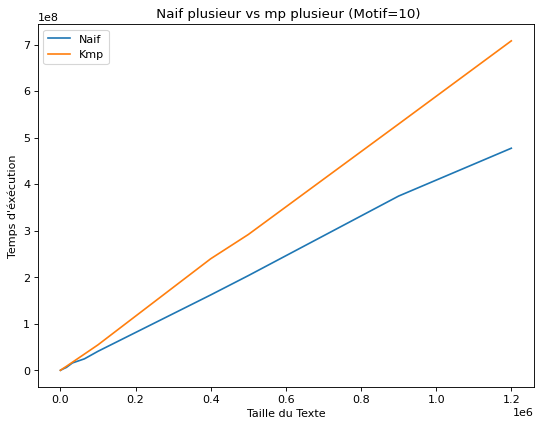

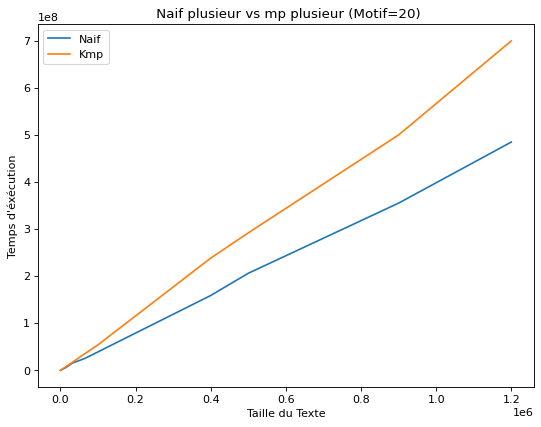

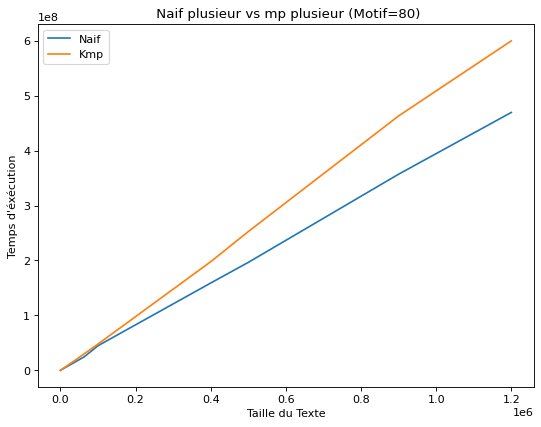

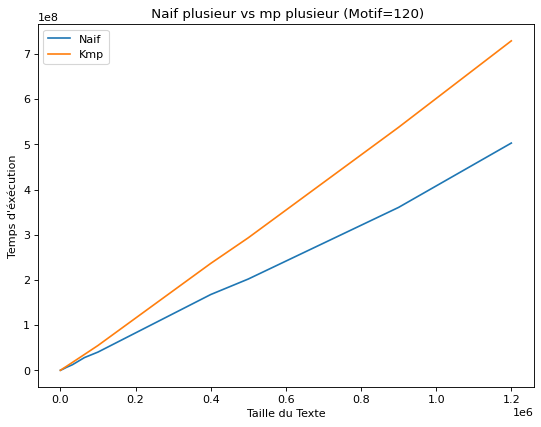

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

for sample_size in [10,20,80,120]:
  sample_data=  result[result.needle_length == sample_size]
  figure(figsize=(8, 6), dpi=80)

  plt.plot(sample_data['haystack_length'],sample_data['time_naif_all'],label='Naif')
  plt.plot(sample_data['haystack_length'],sample_data['time_kmp_all'],label='Kmp')
  
  

  plt.title(f' Naif plusieur vs mp plusieur (Motif={sample_size})')
  # Set the y axis label of the current axis.
  plt.xlabel('Taille du Texte')
  plt.ylabel('Temps d\'éxécution')
  # show a legend on the plot
  plt.legend()

  fig1 = plt.gcf()
  # Display a figure.
  plt.show()
  #fig1.savefig(f'plots/time_{sample_size}.png')